## IMPORT DAS VÁRIAVEIS DE DADOS

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

membroexcel = 'banco-de-dados/perna-direita/27-08/JD 0 QD 1.xlsx' #JOELHO 1, QUADRIL 0
membrocsv = 'banco-de-dados/perna-direita/27-08/JD 0 QD 1 2.csv' #JOELHO 0, QUADRIL 1
df_csv = pd.read_csv(membrocsv, header=0, usecols=lambda col: col.strip(), engine='python')
df_excel = pd.read_excel(membroexcel)

### PLOTAGEM DOS GRÁFICOS DO CSV 
- COMPARAÇÃO DOS VALORES DE ANGULOS DO JOELHO E DA CINTURA

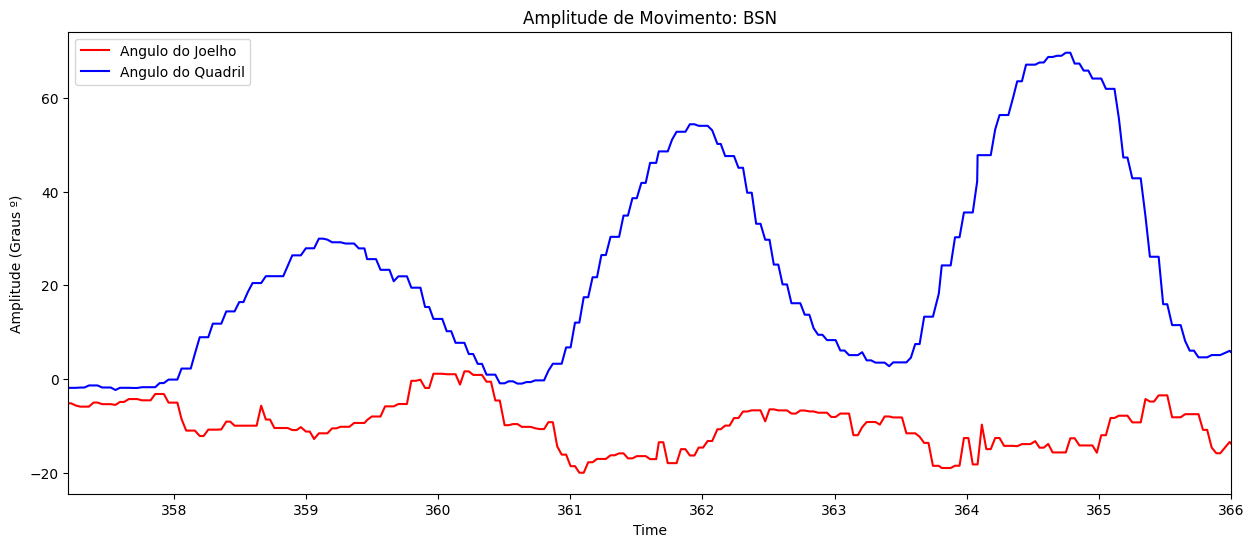

In [164]:
tempo = df_csv.columns[0] 
ang_joelho = df_csv.columns[-1]
ang_quadril = df_csv.columns[-2]

# Criando o gráfico usando a primeira e a última coluna
plt.figure(figsize=(15, 6))
plt.plot(df_csv[tempo], (df_csv[ang_joelho]*-1) + 180, color = 'red')
plt.plot(df_csv[tempo], (df_csv[ang_quadril]*-1) +180, color = 'blue')
plt.title('Amplitude de Movimento: BSN')
plt.xlabel(tempo)
# ------------------------------------------------------------------- VALORES A EDITAR MANUALMENTE -------------------------------------------------------------------
x_ini_csv = 357.2
x_fnl_csv = 366

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------
plt.xlim(x_ini_csv, x_fnl_csv)
plt.legend(['Angulo do Joelho', 'Angulo do Quadril'])
plt.ylabel("Amplitude (Graus º)")
plt.show()

## PLOTAGEM DOS GRÁFICOS EXCEL
- COMPARAÇÃO DOS ANGULOS DO JOELHO E DO QUADRIL


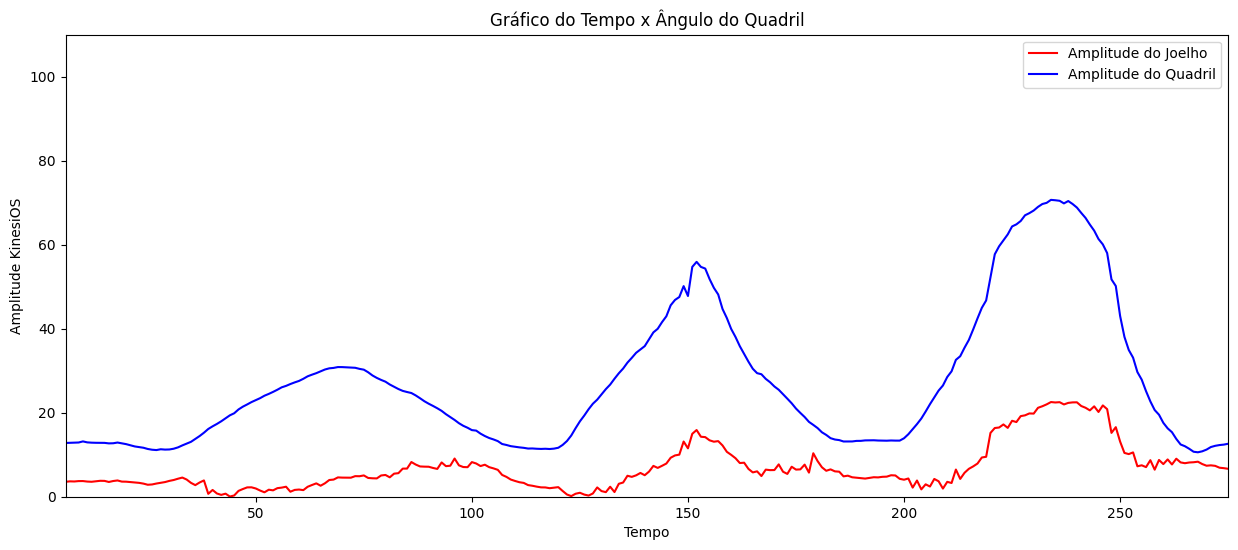

In [165]:
quadro = df_excel['Quadro']
amplitude_joelho = df_excel['Amplitude do Joelho (Direito)']
amplitude_quadril = df_excel['Amplitude do Quadril (Direito)']

plt.figure(figsize=(15, 6))
plt.plot(quadro, amplitude_joelho, color = 'red' )
plt.plot(quadro, amplitude_quadril, color = 'blue')
plt.xlabel("Tempo")
# ------------------------------------------------------------------- VALORES A EDITAR MANUALMENTE -------------------------------------------------------------------
x_ini_excel = 6
x_fnl_excel = 275
plt.ylim(0,110) #muda só pra ficar mais bonito pro relatório
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------
plt.xlim(x_ini_excel, x_fnl_excel)
plt.ylabel("Amplitude KinesiOS")
plt.title("Gráfico do Tempo x Ângulo do Quadril")
plt.legend(['Amplitude do Joelho', 'Amplitude do Quadril'])
plt.show()

# Normalização dos dados para comparação 
- Gráfica
- Estatística


## Normalização do tempo/indice.
- Indice[0] agora representa o tempo[0] (x_ini_csv)

0        0
1        1
2        2
3        3
4        4
      ... 
259    259
260    260
261    261
262    262
263    263
Name: Time, Length: 264, dtype: int64
0        0
1        1
2        2
3        3
4        4
      ... 
265    265
266    266
267    267
268    268
269    269
Name: Quadro, Length: 270, dtype: int64


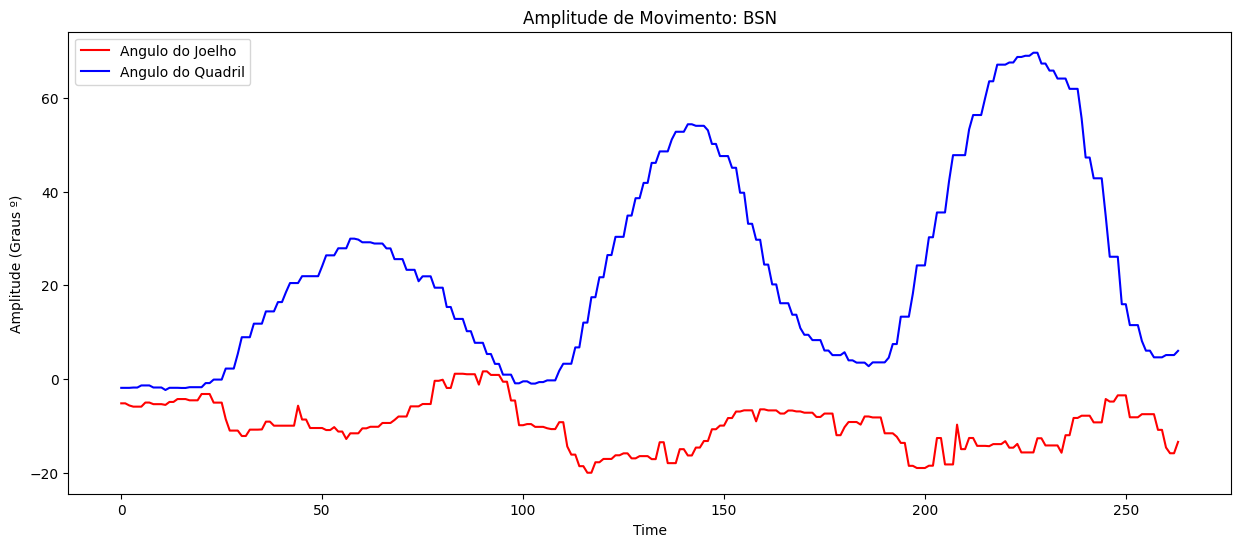

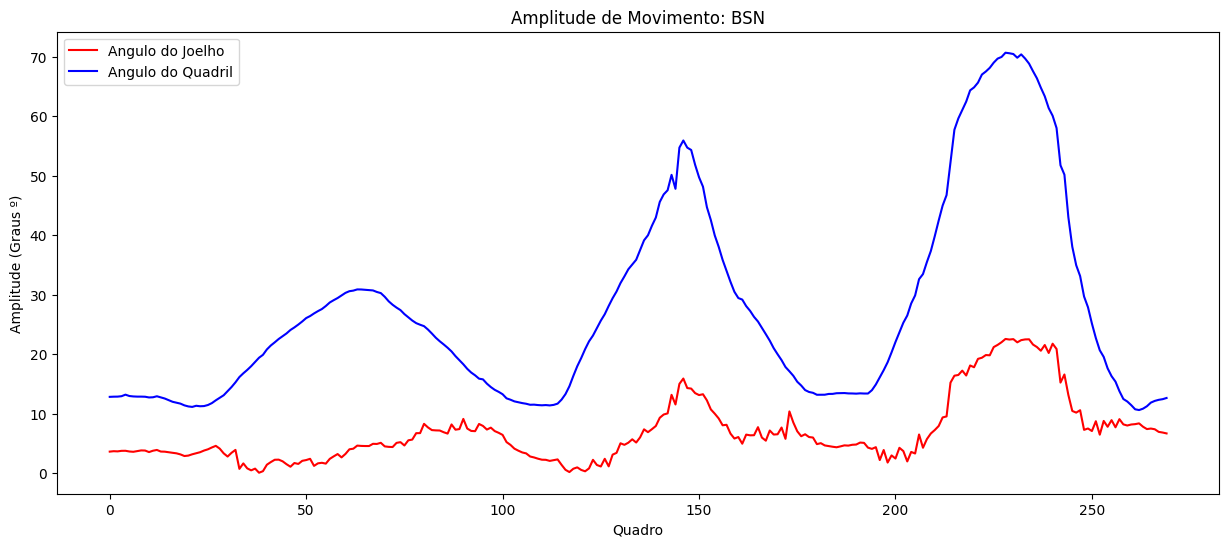

In [166]:
#----- iniciação das variáveis

df_csv_norm = df_csv.copy()
df_excel_norm = df_excel.copy()

tempo = df_csv_norm.columns[0]
ang_joelho = df_csv_norm.columns[-1]
ang_quadril = df_csv_norm.columns[-2]

quadro = df_excel_norm['Quadro']
amplitude_joelho  = df_excel_norm['Amplitude do Joelho (Direito)']
amplitude_quadril = df_excel_norm['Amplitude do Quadril (Direito)']

#----- fazendo iloc das tabelas de amplitude(angulo) por tempo

# 1. Encontre o índice do valor de 'tempo' mais próximo a x_ini_csv
x_ini_csv = (df_csv_norm[tempo] - x_ini_csv).abs().idxmin()
x_ini_excel = (quadro - x_ini_excel).abs().idxmin()

# 2. Encontre o índice do valor de 'tempo' mais próximo a x_fnl_csv
x_fnl_csv = (df_csv_norm[tempo] - x_fnl_csv).abs().idxmin()
x_fnl_excel = (quadro - x_fnl_excel).abs().idxmin()

# 3. Use iloc para selecionar o intervalo de linhas entre os dois índices
df_csv_norm = df_csv_norm.iloc[x_ini_csv:x_fnl_csv+1]  # +1 para incluir o índice final
df_csv_norm = df_csv_norm.reset_index(drop=True)

df_excel_norm = df_excel_norm.iloc[x_ini_excel:x_fnl_excel + 1]  # +1 para incluir o índice final
df_excel_norm = df_excel_norm.reset_index(drop=True)

df_excel_norm["Quadro"] = df_excel_norm.index
df_csv_norm[tempo] = df_csv_norm.index

#---- plotagem de gráficos (teste de se ta funcionando)

plotar_graficos = True #bom pra ajustes finos

if(plotar_graficos):

    print(df_csv_norm[tempo])
    print(df_excel_norm['Quadro'])

    plt.figure(figsize=(15, 6))
    plt.plot(df_csv_norm[tempo], (df_csv_norm[ang_joelho]*-1) + 180, color = 'red')
    plt.plot(df_csv_norm[tempo], (df_csv_norm[ang_quadril]*-1) +180, color = 'blue')
    plt.title('Amplitude de Movimento: BSN')
    plt.xlabel(tempo)
    plt.legend(['Angulo do Joelho', 'Angulo do Quadril'])
    plt.ylabel("Amplitude (Graus º)")
    plt.show()

    plt.figure(figsize=(15, 6))
    plt.plot(df_excel_norm['Quadro'], df_excel_norm['Amplitude do Joelho (Direito)'] , color='red')
    plt.plot(df_excel_norm['Quadro'], df_excel_norm['Amplitude do Quadril (Direito)'] , color='blue')
    plt.title('Amplitude de Movimento: BSN')
    plt.xlabel('Quadro')
    plt.legend(['Angulo do Joelho', 'Angulo do Quadril'])
    plt.ylabel("Amplitude (Graus º)")
    plt.show()


# ------ agora os indices representam o tempo relativo (ambos ficam com aproximadamente mesma quantidade (3%))

# ------ isso significa que não precisa fazer a relação entre os tempos, assim fica muito mais fácil de fazer qualquer cálcuo

# ------ única coisa que precisa fazer é uma correção manual todo gráfico que for inputado, mas situação fácil 
# ------ printa os valores estatísticos + gráficos plotados juntos


## PLOT DE GRÁFICOS SIMULTÂNEOS
- Gráficos de Joelho (BSN x KIN)
- Gráficos de Quadril (BSN x KIN)
- Graficos de Joelho e Quadril (BSN x KIN)

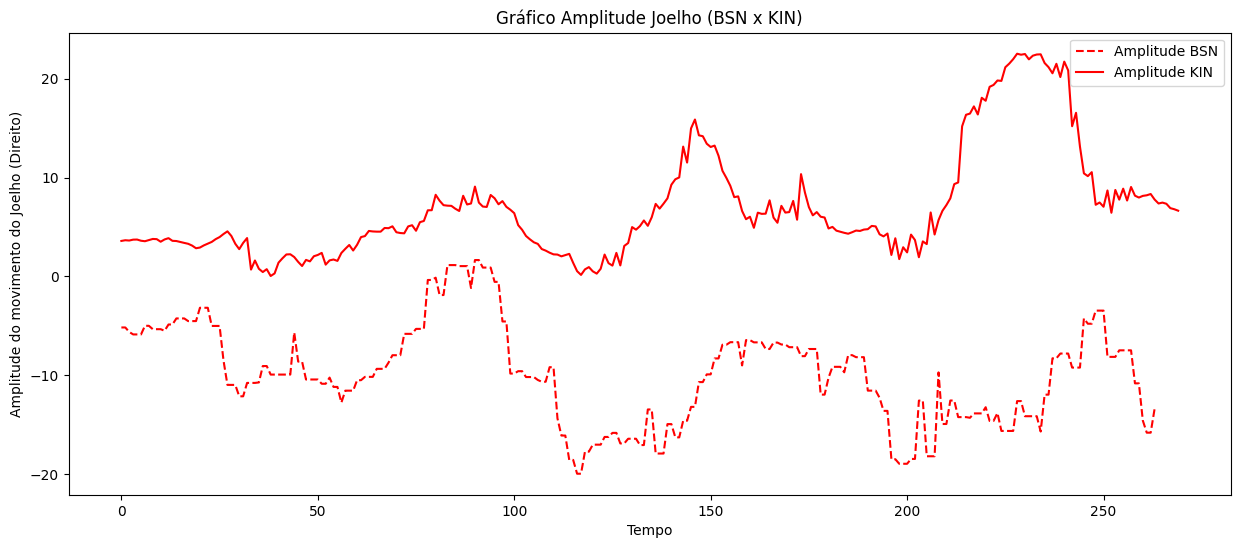

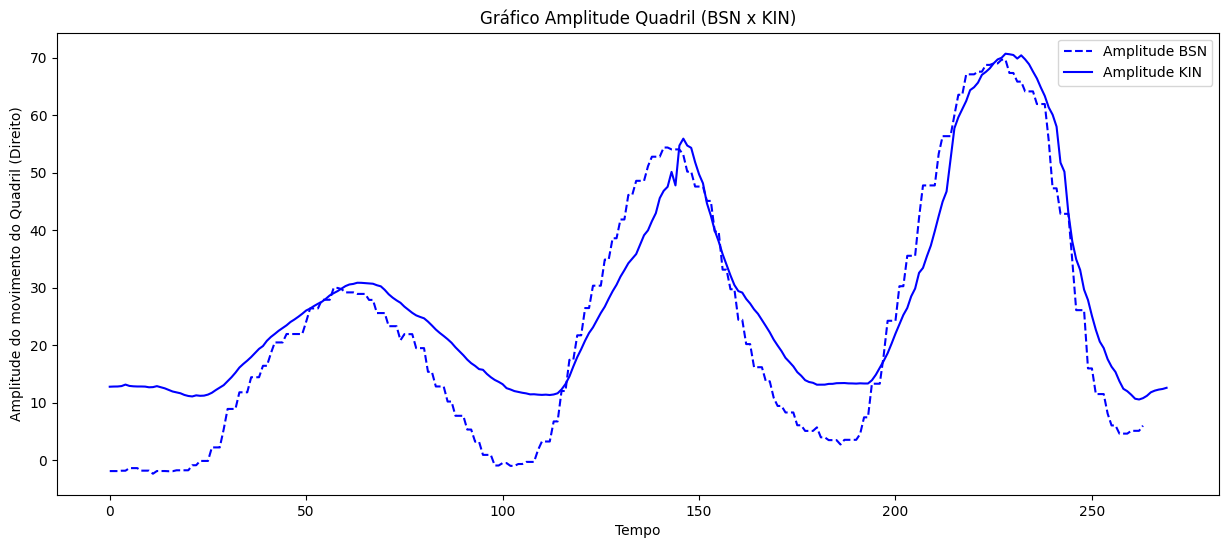

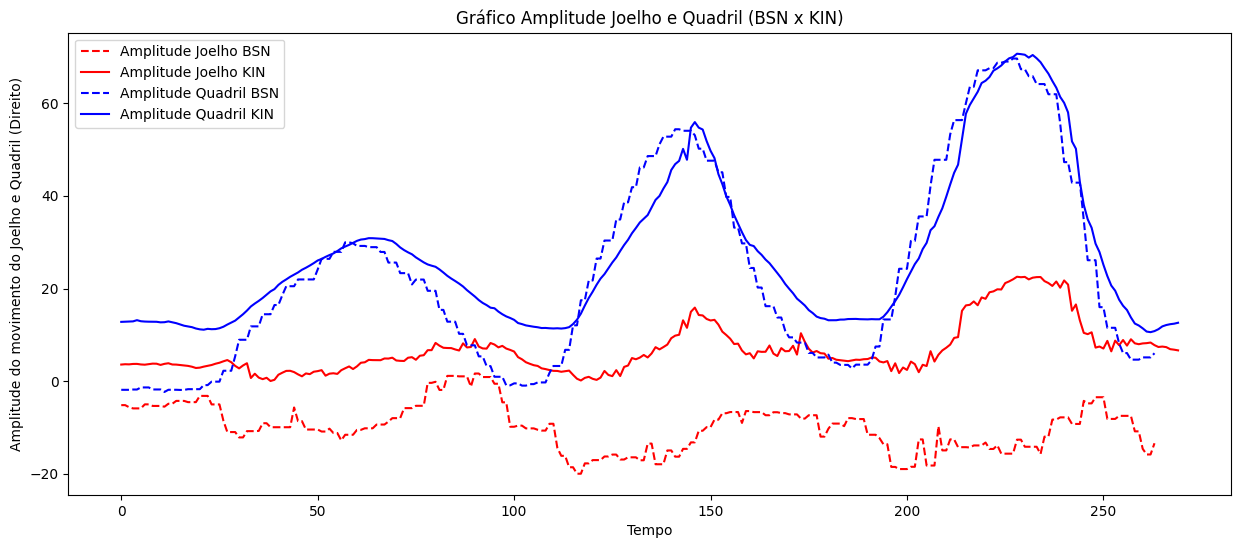

In [167]:
## --------- Joelho (BSN x KIN)
plt.figure(figsize=(15,6))
plt.plot(df_csv_norm[tempo], (df_csv_norm[ang_joelho]*-1) + 180, linestyle='--', color='red')
plt.plot(df_excel_norm['Quadro'], df_excel_norm['Amplitude do Joelho (Direito)'] , linestyle='-', color='red')
plt.xlabel("Tempo")
plt.ylabel("Amplitude do movimento do Joelho (Direito)")
plt.title("Gráfico Amplitude Joelho (BSN x KIN)")
plt.legend(['Amplitude BSN','Amplitude KIN'])
plt.show()

## -------- Quadril (BSN x KIN)
plt.figure(figsize=(15,6))
plt.plot(df_csv_norm[tempo], (df_csv_norm[ang_quadril]*-1) + 180, linestyle='--', color='blue')
plt.plot(df_excel_norm['Quadro'], df_excel_norm['Amplitude do Quadril (Direito)'] , linestyle='-', color='blue')
plt.xlabel("Tempo")
plt.ylabel("Amplitude do movimento do Quadril (Direito)")
plt.title("Gráfico Amplitude Quadril (BSN x KIN)")
plt.legend(['Amplitude BSN','Amplitude KIN'])
plt.show()

## -------- Joelho e Quadril (BSN x KIN) 
plt.figure(figsize=(15,6))
plt.plot(df_csv_norm[tempo], (df_csv_norm[ang_joelho]*-1) + 180, linestyle='--', color='red')
plt.plot(df_excel_norm['Quadro'], df_excel_norm['Amplitude do Joelho (Direito)'] , linestyle='-', color='red')
plt.plot(df_csv_norm[tempo], (df_csv_norm[ang_quadril]*-1) + 180, linestyle='--', color='blue')
plt.plot(df_excel_norm['Quadro'], df_excel_norm['Amplitude do Quadril (Direito)'] , linestyle='-', color='blue')
plt.xlabel("Tempo")
plt.ylabel("Amplitude do movimento do Joelho e Quadril (Direito)")
plt.title("Gráfico Amplitude Joelho e Quadril (BSN x KIN)")
plt.legend(['Amplitude Joelho BSN','Amplitude Joelho KIN','Amplitude Quadril BSN','Amplitude Quadril KIN'])
plt.show()

## ESTATÍSTICAS E VALORES COMPARATIVOS ENTRE AMBOS
- Diferença média entre os valores medidos (Amplitude de Joelho e Quadril).
- Maior diferença entre os valores medidos (Joelho e Quadril).
- Menor diferença entre os valores medidos (Joelho e Quadril).
- Média dos valores do BSN (Joelho e Quadril).
- Média dos valores do KIN (Joelho e Quadril).
- Diferença da média dos valores (BSN x KIN).

### Modificação manual dos valores.
- Diferença média entre os valores medidos (Amplitude de Joelho e Quadril). (Modificados)
- Maior diferença entre os valores medidos (Joelho e Quadril). (Modificados)
- Menor diferença entre os valores medidos (Joelho e Quadril). (Modificados)
- Média dos valores do BSN (Joelho e Quadril). (Modificados)
- Média dos valores do KIN (Joelho e Quadril). (Modificados)
- Diferença da média dos valores (BSN x KIN). (Modificados)


Estatísticas naturais das amplitudes: 
Diferença média entre os valores (Joelho):  16.763007196969696
Maior diferença entre os valores (Joelho):  38.18599999999999
Menor diferença entre os valores (Joelho):  5.578699999999993
Média da amplitude BSN (Joelho):  -9.854029924242427
Média da amplitude KIN (Joelho):  6.913074074074074
Média da amplitude das duas técnicas (Joelho):  -1.4704779250841766
Diferença das médias das amplitudes (BSN | KIN) (Joelho):  16.7671039983165

Diferença média entre os valores (Quadril):  7.069575757575759
Maior diferença entre os valores (Quadril):  15.05329999999999
Menor diferença entre os valores (Quadril):  0.01799999999998647
Média da amplitude BSN (Quadril):  23.47820984848485
Média da amplitude KIN (Quadril):  27.357666666666667
Média da amplitude das duas técnicas (Quadril):  25.417938257575756
Diferença das médias das amplitudes (BSN | KIN) (Quadril):  3.8794568181818185

Estatísticas MODIFICADAS das amplitudes:
Diferença média entre os valores (Jo

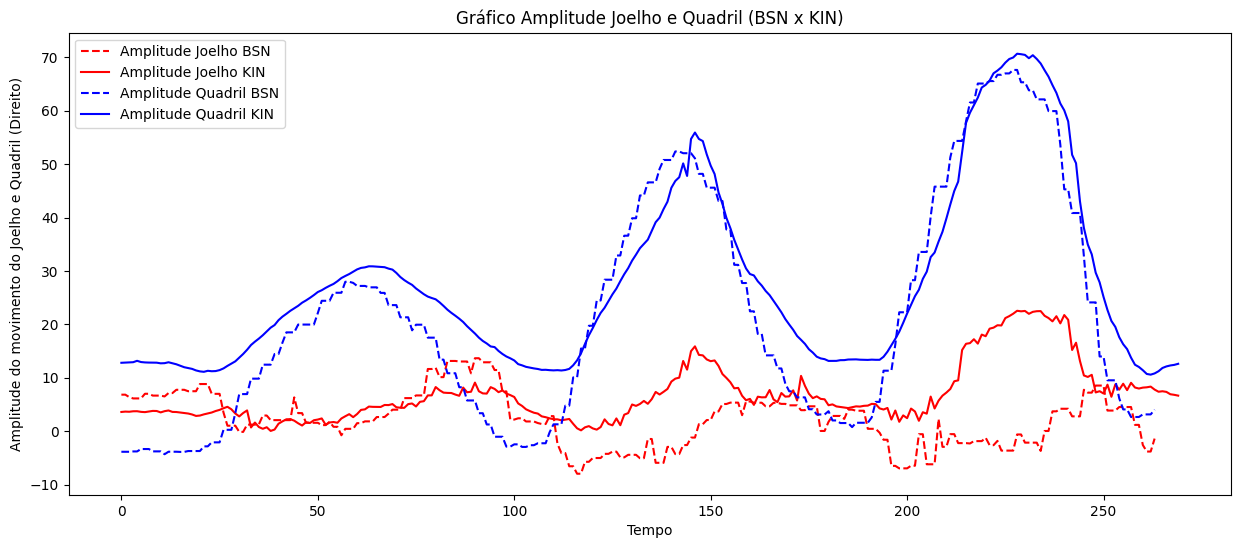

In [172]:
# Converter para arrays do NumPy
ang_joelho_values = (df_csv_norm[ang_joelho].values * -1) + 180
amplitude_joelho_values = df_excel_norm['Amplitude do Joelho (Direito)'].values

# Encontrar o tamanho mínimo entre os dois arrays
min_length = min(len(ang_joelho_values), len(amplitude_joelho_values))

# Calcular a diferença absoluta apenas até o tamanho da menor lista
dif_joelho = abs(ang_joelho_values[:min_length] - amplitude_joelho_values[:min_length])

print("\nEstatísticas naturais das amplitudes: ")

print("Diferença média entre os valores (Joelho): ", dif_joelho.mean())
print("Maior diferença entre os valores (Joelho): ", dif_joelho.max())
print("Menor diferença entre os valores (Joelho): ", dif_joelho.min())
print("Média da amplitude BSN (Joelho): ", ang_joelho_values.mean())
print("Média da amplitude KIN (Joelho): ", amplitude_joelho_values.mean())
print("Média da amplitude das duas técnicas (Joelho): ", (ang_joelho_values.mean()+amplitude_joelho_values.mean())/2)
print("Diferença das médias das amplitudes (BSN | KIN) (Joelho): ", abs(ang_joelho_values.mean()-amplitude_joelho_values.mean()))

# Converter para arrays do NumPy
ang_quadril_values = (df_csv_norm[ang_quadril].values * -1) + 180
amplitude_quadril_values = df_excel_norm['Amplitude do Quadril (Direito)'].values

# Calcular a diferença absoluta apenas até o tamanho da menor lista
dif_quadril = abs(ang_quadril_values[:min_length] - amplitude_quadril_values[:min_length])

print("\nDiferença média entre os valores (Quadril): ", dif_quadril.mean())
print("Maior diferença entre os valores (Quadril): ", dif_quadril.max())
print("Menor diferença entre os valores (Quadril): ", dif_quadril.min())
print("Média da amplitude BSN (Quadril): ", ang_quadril_values.mean())
print("Média da amplitude KIN (Quadril): ", amplitude_quadril_values.mean())
print("Média da amplitude das duas técnicas (Quadril): ", (ang_quadril_values.mean()+amplitude_quadril_values.mean())/2)
print("Diferença das médias das amplitudes (BSN | KIN) (Quadril): ", abs(ang_quadril_values.mean()-amplitude_quadril_values.mean()))

## ------ agora manipulação de gráfico para melhor comparação (simularia uma melhor calibração)
df_csv_temp = df_csv_norm.copy()
df_excel_temp = df_csv_norm.copy()

# ------------------------------------------------------------------- VALORES A EDITAR MANUALMENTE -------------------------------------------------------------------
df_csv_temp[tempo] = df_csv_temp[tempo] + 0
df_csv_temp[ang_quadril] = df_csv_temp[ang_quadril] + 2
df_csv_temp[ang_joelho] = df_csv_temp[ang_joelho] - 12
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Converter para arrays do NumPy
ang_joelho_values = (df_csv_temp[ang_joelho].values * -1) + 180
amplitude_joelho_values = df_excel_norm['Amplitude do Joelho (Direito)'].values

# Encontrar o tamanho mínimo entre os dois arrays
min_length = min(len(ang_joelho_values), len(amplitude_joelho_values))

# Calcular a diferença absoluta apenas até o tamanho da menor lista
dif_joelho = abs(ang_joelho_values[:min_length] - amplitude_joelho_values[:min_length])

print("\nEstatísticas MODIFICADAS das amplitudes:")

print("Diferença média entre os valores (Joelho): ", dif_joelho.mean())
print("Maior diferença entre os valores (Joelho): ", dif_joelho.max())
print("Menor diferença entre os valores (Joelho): ", dif_joelho.min())
print("Média da amplitude BSN (Joelho): ", ang_joelho_values.mean())
print("Média da amplitude KIN (Joelho): ", amplitude_joelho_values.mean())
print("Média da amplitude das duas técnicas (Joelho): ", (ang_joelho_values.mean()+amplitude_joelho_values.mean())/2)
print("Diferença das médias das amplitudes (BSN | KIN) (Joelho): ", abs(ang_joelho_values.mean()-amplitude_joelho_values.mean()))

# Converter para arrays do NumPy
ang_quadril_values = (df_csv_temp[ang_quadril].values * -1) + 180
amplitude_quadril_values = df_excel_norm['Amplitude do Quadril (Direito)'].values

# Calcular a diferença absoluta apenas até o tamanho da menor lista
dif_quadril = abs(ang_quadril_values[:min_length] - amplitude_quadril_values[:min_length])

print("\nDiferença média entre os valores (Quadril): ", dif_quadril.mean())
print("Maior diferença entre os valores (Quadril): ", dif_quadril.max())
print("Menor diferença entre os valores (Quadril): ", dif_quadril.min())
print("Média da amplitude BSN (Quadril): ", ang_quadril_values.mean())
print("Média da amplitude KIN (Quadril): ", amplitude_quadril_values.mean())
print("Média da amplitude das duas técnicas (Quadril): ", (ang_quadril_values.mean()+amplitude_quadril_values.mean())/2)
print("Diferença das médias das amplitudes (BSN | KIN) (Quadril): ", abs(ang_quadril_values.mean()-amplitude_quadril_values.mean()))

print("\nx_ini_csv: ", x_ini_csv)
print("x_fnl_csv: ", x_fnl_csv)
print("x_ini_excel: ", x_ini_excel)
print("x_fnl_excel: ", x_fnl_excel)
      

debug = True #pra facilitar de manipular o gráfico (bom para ver)
if debug: 
    plt.figure(figsize=(15,6))
    plt.plot(df_csv_temp[tempo], (df_csv_temp[ang_joelho]*-1) + 180, linestyle='--', color='red')
    plt.plot(df_excel_norm['Quadro'], df_excel_norm['Amplitude do Joelho (Direito)'] , linestyle='-', color='red')
    plt.plot(df_csv_temp[tempo], (df_csv_temp[ang_quadril]*-1) + 180, linestyle='--', color='blue')
    plt.plot(df_excel_norm['Quadro'], df_excel_norm['Amplitude do Quadril (Direito)'] , linestyle='-', color='blue')
    plt.xlabel("Tempo")
    plt.ylabel("Amplitude do movimento do Joelho e Quadril (Direito)")
    plt.title("Gráfico Amplitude Joelho e Quadril (BSN x KIN)")
    plt.legend(['Amplitude Joelho BSN','Amplitude Joelho KIN','Amplitude Quadril BSN','Amplitude Quadril KIN'])
    plt.show()